<a href="https://colab.research.google.com/github/min02yam/R-study/blob/main/20220813(%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

기계학습

# 0.패키지 및 데이터 로드

In [12]:
suppressPackageStartupMessages({
  require(tidyverse)
  require(magrittr)
  require(data.table)
})

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


In [86]:
#install.packages("DataExplorer")
#library(DataExplorer)
#install.packages("mice")
#library(mice)
install.packages("VIM")
library(VIM)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘zoo’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘lme4’, ‘DEoptimR’, ‘lmtest’, ‘proxy’, ‘RcppEigen’, ‘car’, ‘robustbase’, ‘sp’, ‘vcd’, ‘e1071’, ‘laeken’, ‘ranger’


Loading required package: colorspace

Loading required package: grid

VIM is ready to use.


Suggestions and bug-reports can be submitted at: https://github.com/statistikat/VIM/issues


Attaching package: ‘VIM’


The following object is masked from ‘package:datasets’:

    sleep




In [13]:
system("gdown --id 19EyKlrfUCIeEuxu_JHb7hsII8sRJhYnT")

In [14]:
dt = fread("/content/student-absences (1).csv")

# 1-1

## 1-1-1.	
주어진 데이터에 대한 탐색적 데이터 분석을 수행하시오. 또한 탐색적 분석과정에서 필요한 시각화와 함께 분석결과를 제시하시오. (5점)

In [20]:
glimpse(dt)
summary(dt)
colSums(is.na(dt))

Rows: 395
Columns: 12
$ sex        <chr> "F", "F", "F", "F", "F", "M", "M", "F", "M", "M", "F", "F",…
$ age        <int> 18, 17, 15, 15, 16, 16, 16, 17, 15, 15, 15, 15, 15, 15, 15,…
$ Pstatus    <chr> "A", "T", "T", "T", "T", "T", "T", "A", "A", "T", "T", "T",…
$ Medu       <int> 4, 1, 1, 4, 3, 4, 2, 4, 3, 3, 4, 2, 4, 4, 2, 4, 4, 3, 3, 4,…
$ Fedu       <int> 4, 1, 1, 2, 3, 3, 2, 4, 2, 4, 4, 1, 4, 3, 2, 4, 4, 3, 2, 3,…
$ guardian   <chr> "mother", "father", "mother", "mother", "father", "mother",…
$ traveltime <int> 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 2, 1, 1, 1, 3, 1, 1,…
$ studytime  <int> 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 1, 2, 3, 1, 3, 2, 1, 1,…
$ failures   <int> 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0,…
$ famrel     <int> 4, 5, 4, 3, 4, 5, 4, 4, 4, 5, 3, 5, 4, 5, 4, 4, 3, 5, 5, 3,…
$ freetime   <int> 3, 3, 3, 2, 3, 4, 4, 1, 2, 5, 3, 2, 3, 4, 5, 4, 2, 3, 5, 1,…
$ absences   <int> 6, 4, 10, 2, 4, 10, 0, 6, 0, 0, 0, 4, 2, 2, 0, 4, 6, 4, 16,…


     sex                 age         Pstatus               Medu    
 Length:395         Min.   :15.0   Length:395         Min.   :0.0  
 Class :character   1st Qu.:16.0   Class :character   1st Qu.:2.0  
 Mode  :character   Median :17.0   Mode  :character   Median :3.0  
                    Mean   :16.7                      Mean   :2.7  
                    3rd Qu.:18.0                      3rd Qu.:4.0  
                    Max.   :22.0                      Max.   :4.0  
                    NA's   :3                                      
      Fedu       guardian           traveltime    studytime    failures  
 Min.   :0.0   Length:395         Min.   :1.0   Min.   :1   Min.   :0.0  
 1st Qu.:2.0   Class :character   1st Qu.:1.0   1st Qu.:1   1st Qu.:0.0  
 Median :2.0   Mode  :character   Median :1.0   Median :2   Median :0.0  
 Mean   :2.5                      Mean   :1.4   Mean   :2   Mean   :0.3  
 3rd Qu.:3.0                      3rd Qu.:2.0   3rd Qu.:2   3rd Qu.:0.0  
 Max.   :4.0

sex        age    Pstatus       Medu       Fedu   guardian traveltime 
         0          3          0          0          0          0          0 
 studytime   failures     famrel   freetime   absences 
         0          5          0          0          0

1. 타겟 제외한 피처 총 11개, 그 중 cat 3 num 8
2. 2개의 num 피처에 결측 존재

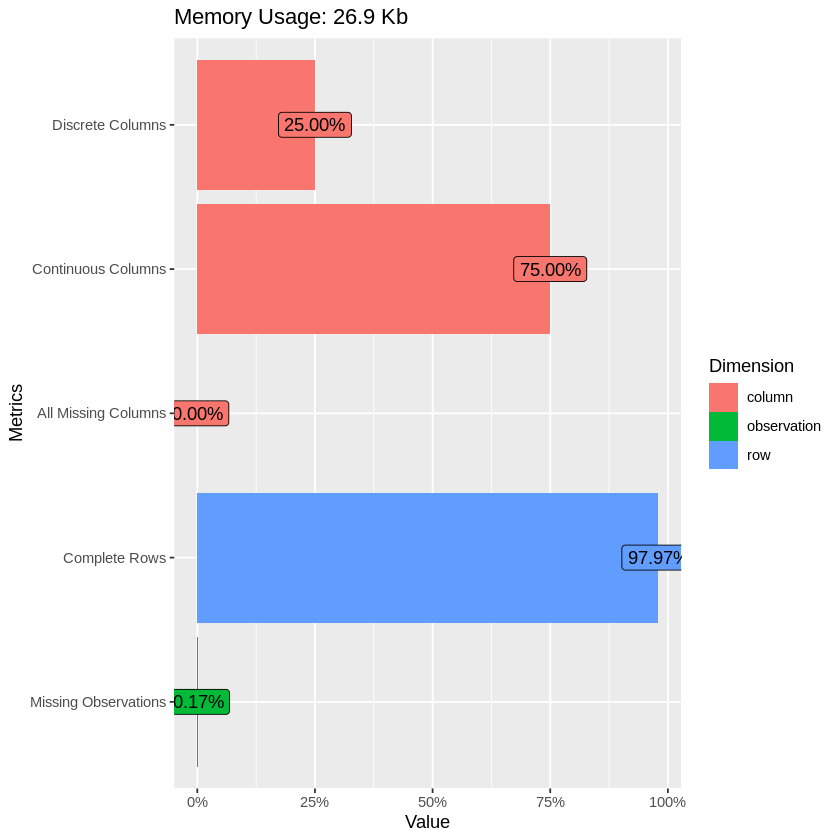

In [16]:
plot_intro(dt)

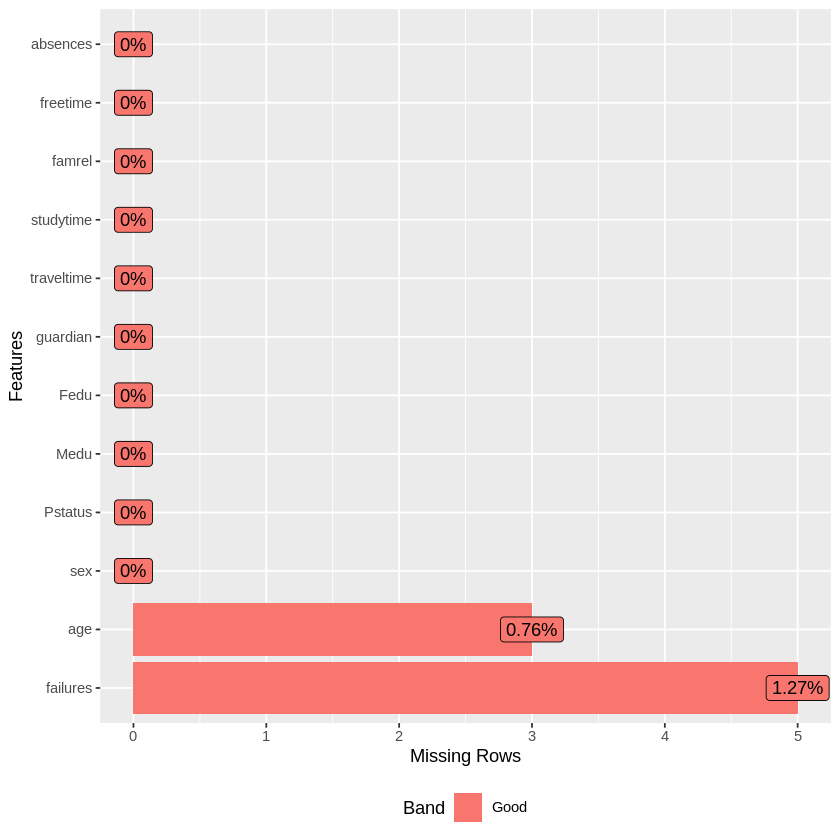

In [21]:
plot_missing(dt)

Warning message:
“Removed 8 rows containing non-finite values (stat_boxplot).”


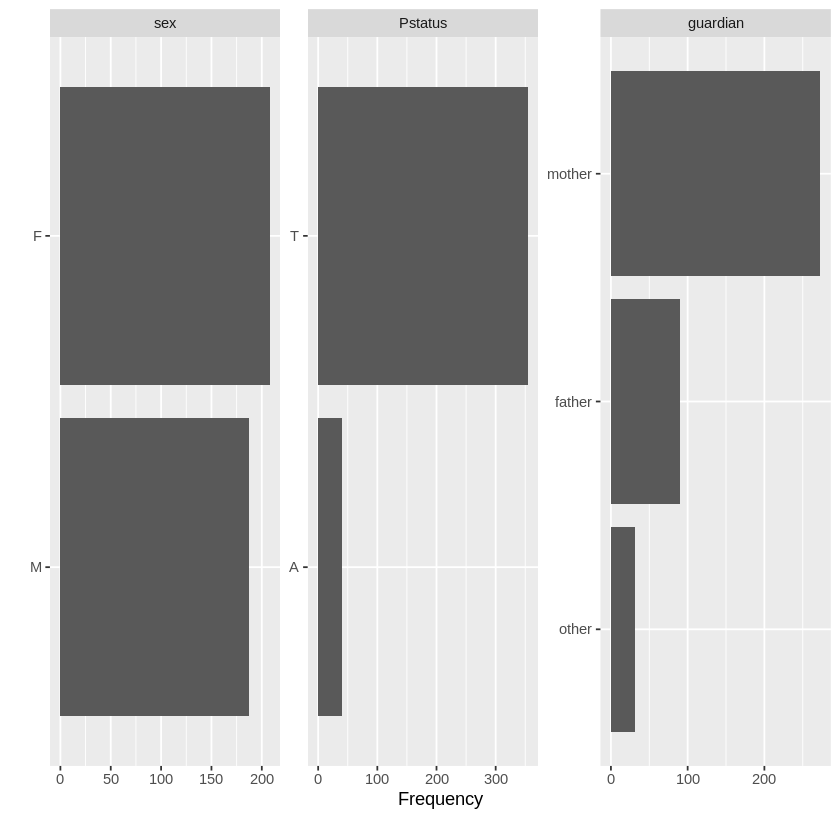

Warning message:
“Removed 8 rows containing non-finite values (stat_boxplot).”


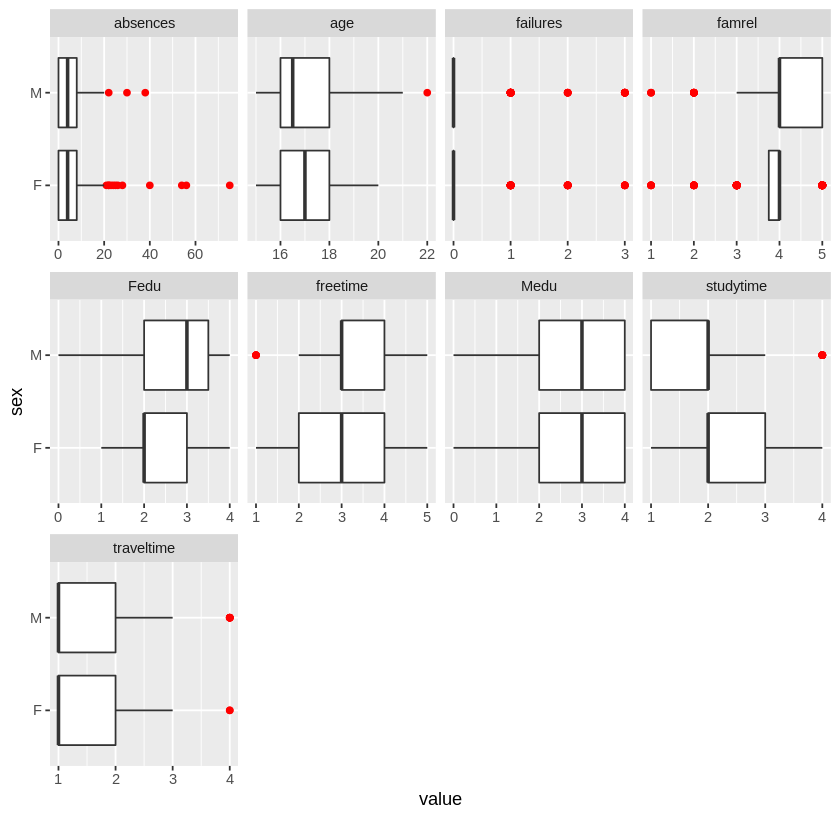

Warning message:
“Removed 8 rows containing non-finite values (stat_boxplot).”


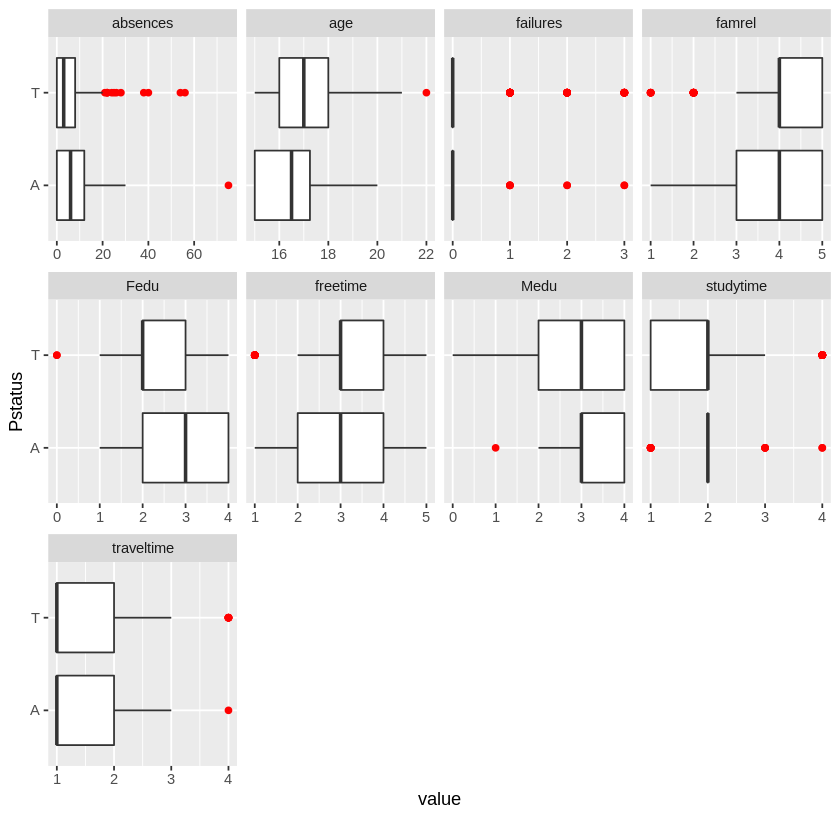

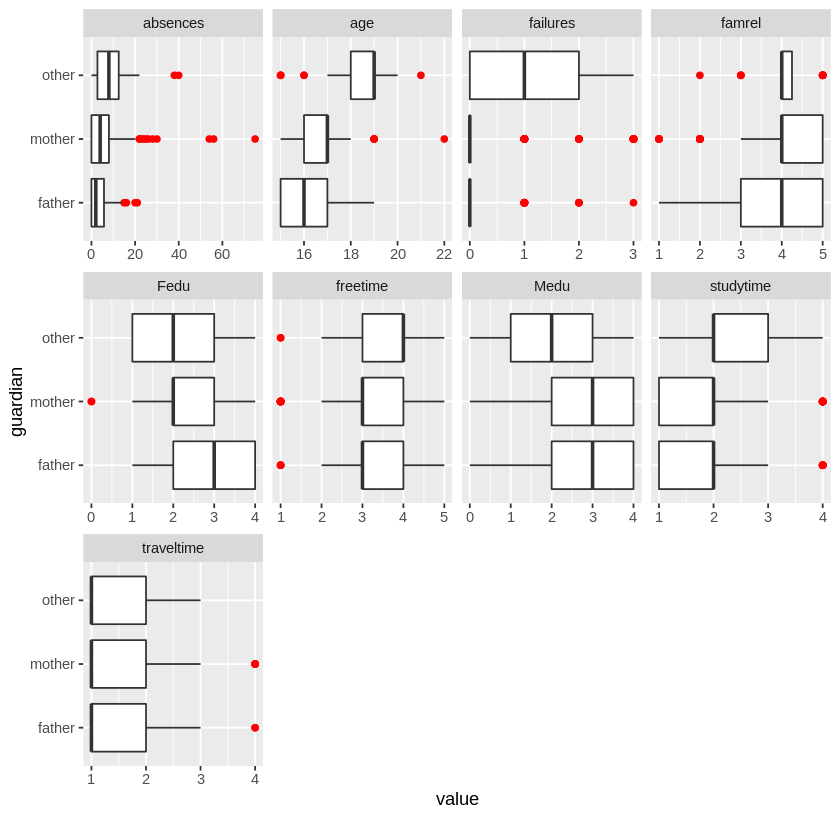

In [43]:
#cat
plot_bar(dt)
plot_boxplot(dt, by="sex",  geom_boxplot_args = list("outlier.color" = "red"))
plot_boxplot(dt, by="Pstatus", geom_boxplot_args = list("outlier.color" = "red"))
plot_boxplot(dt, by="guardian", geom_boxplot_args = list("outlier.color" = "red"))

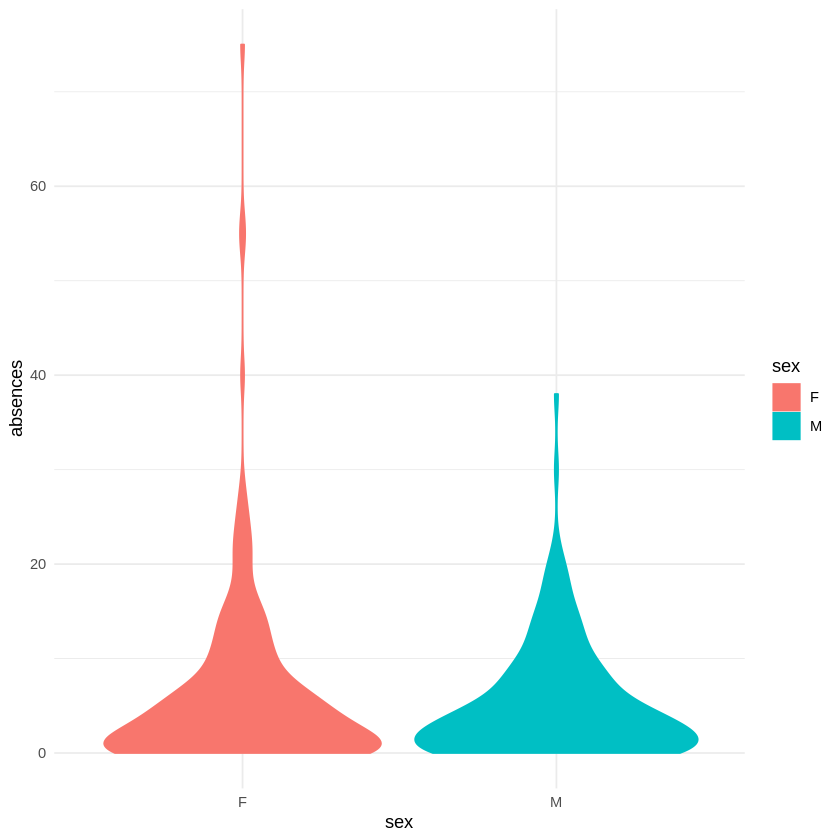

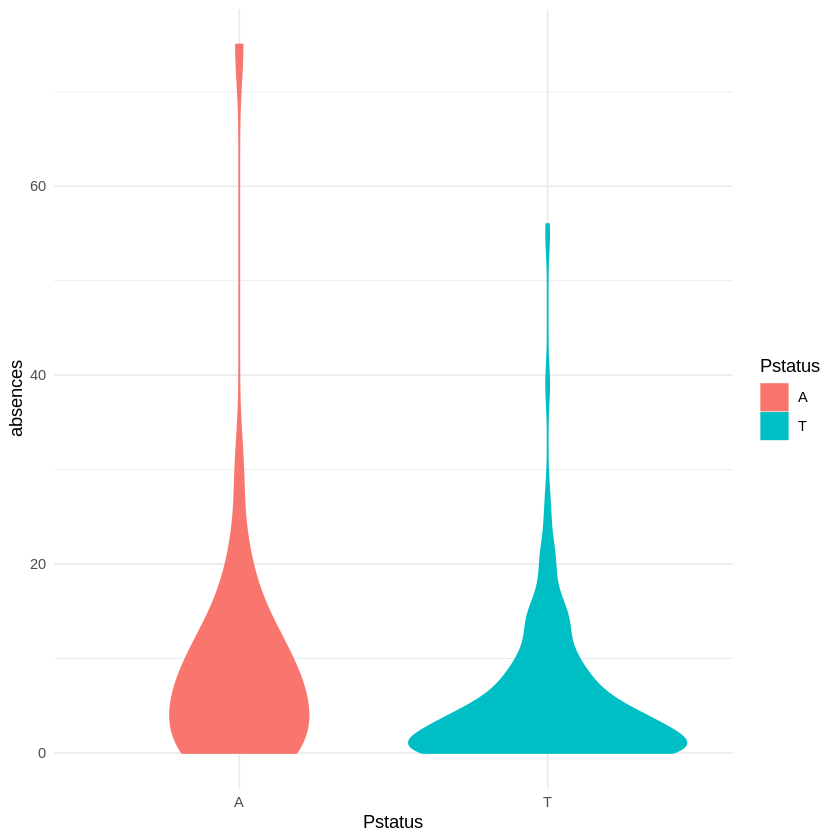

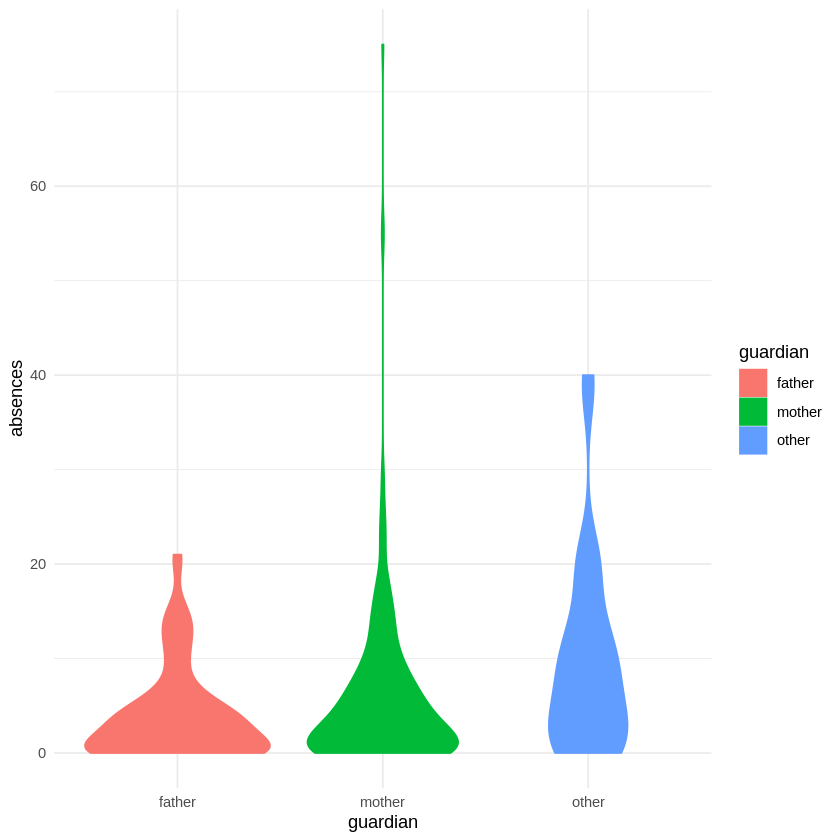

In [32]:
ggplot(dt) +
  aes(
    x = sex,
    y = absences,
    fill = sex,
    colour = sex,
  ) +
  geom_violin(adjust = 1L, scale = "area") +
  scale_fill_hue(direction = 1) +
  scale_color_hue(direction = 1) +
  theme_minimal()
#Pstatus
  ggplot(dt) +
  aes(
    x = Pstatus,
    y = absences,
    fill = Pstatus,
    colour = Pstatus,
  ) +
  geom_violin(adjust = 1L, scale = "area") +
  scale_fill_hue(direction = 1) +
  scale_color_hue(direction = 1) +
  theme_minimal()
  #Pstatus
  ggplot(dt) +
  aes(
    x = guardian,
    y = absences,
    fill =guardian,
    colour = guardian,
  ) +
  geom_violin(adjust = 1L, scale = "area") +
  scale_fill_hue(direction = 1) +
  scale_color_hue(direction = 1) +
  theme_minimal()

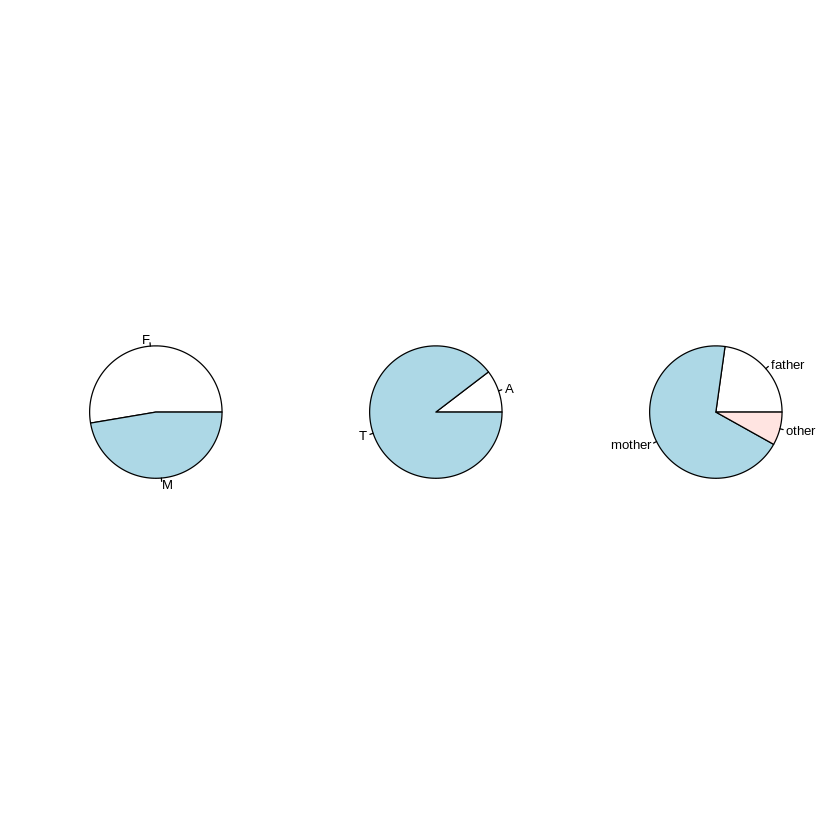

In [65]:
par(mfrow=c(1,3))
pie(prop.table(table(dt[,'sex'])))
pie(prop.table(table(dt[,3])))
pie(prop.table(table(dt[,6])))

1. ‘F’여학생은 남학생에 비해 결석 일수가 높게 분포한다. 분포 형태는 비슷하다.
2. 부모가 ‘A’별거 중인 학생이 동거중인 학생과 비교하여 결석 일수가 높게 분포한다.
3. 보호자가 mother인 학생이 다른 학생보다 결석 일수가 높고, father는 낮다. Other는 비교적 높은 결석일자에 많은 분포를 보인다.
4. 이는 각 클래스 빈도의 비율에 대한 파이차트를 살펴 보았을 때 유의미한 발견이라고 할 수 있음

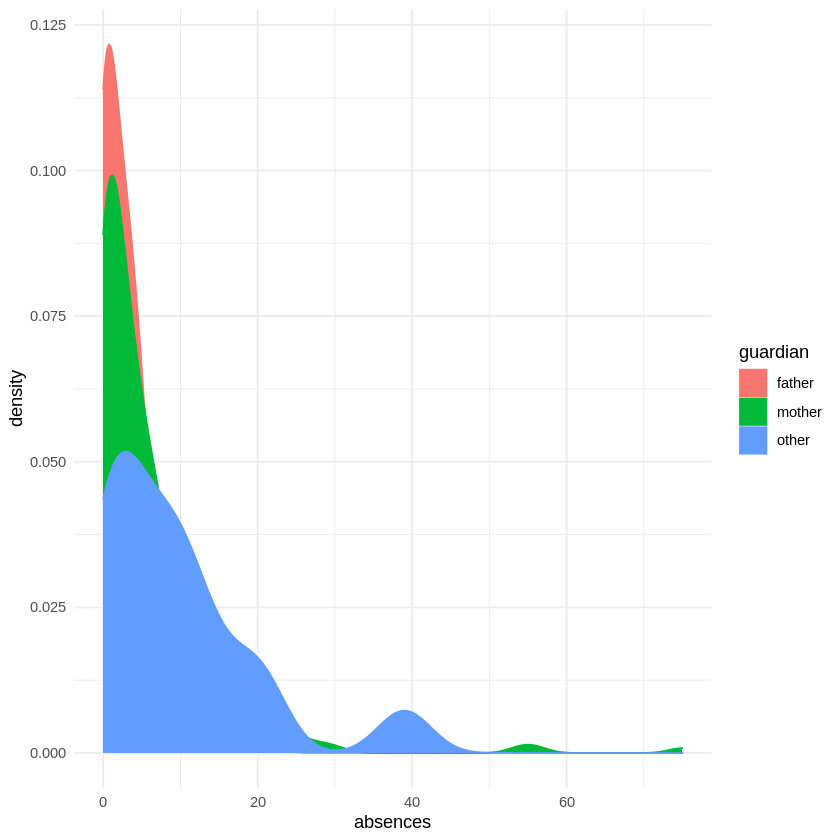

In [33]:
ggplot(dt) +
  aes(x = absences, fill = guardian, colour = guardian) +
  geom_density(adjust = 1L) +
  scale_fill_hue(direction = 1) +
  scale_color_hue(direction = 1) +
  theme_minimal()

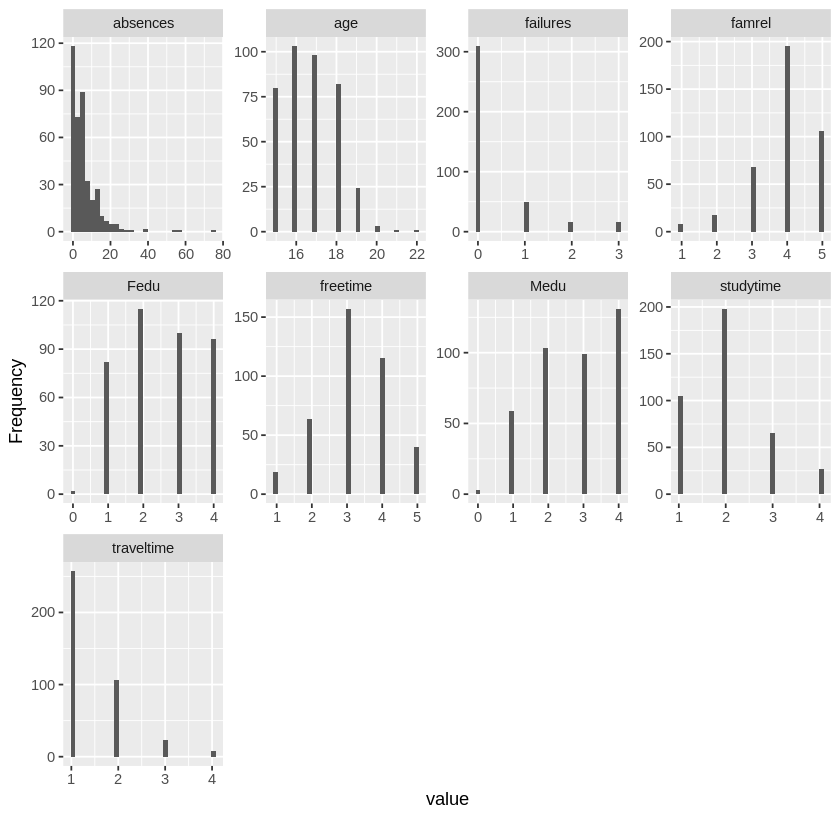

In [34]:
#num
plot_histogram(dt)

cat처럼 보이는 것도 있음

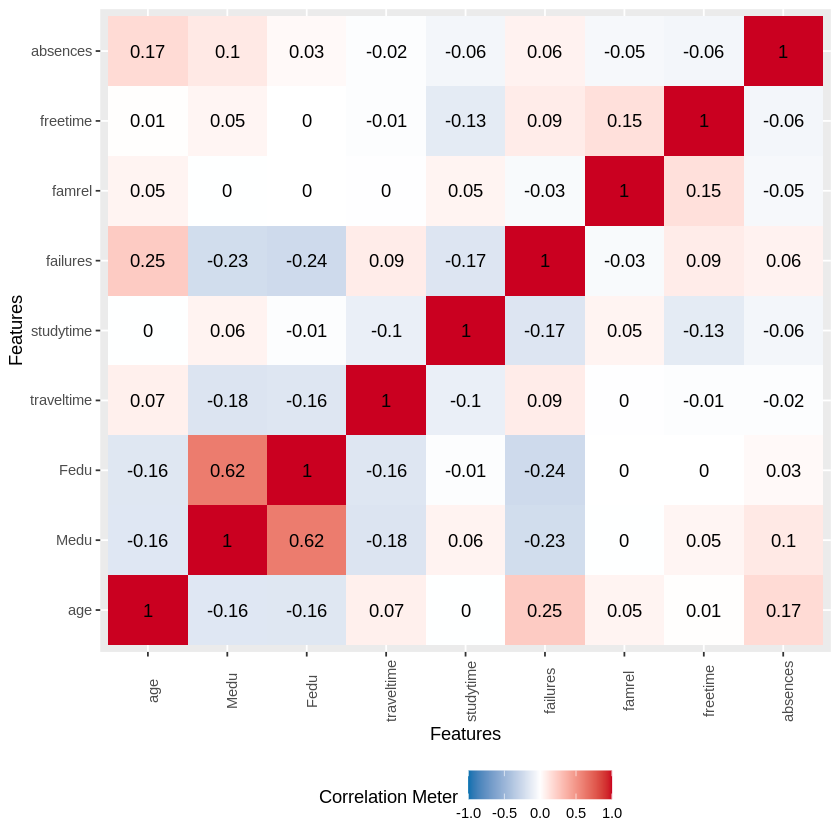

In [53]:
dt %>% select_if(is.numeric) -> dt_numeric
plot_correlation(na.omit(dt_numeric))

## 1-1-2.	
주어진 데이터로 예측분석을 수행할 때 필요한 전처리 과정을 시각화를 포함하여 제시하시오. 또한, 각각의 전처리를 수행함에 따라 전처리가 예측분석에 어떠한 영향을 미치는지를 제시하시오. (5점)
- 결측치 대체
- 품질 향상으로 인항 ㅁ모델 성능 개선 기대

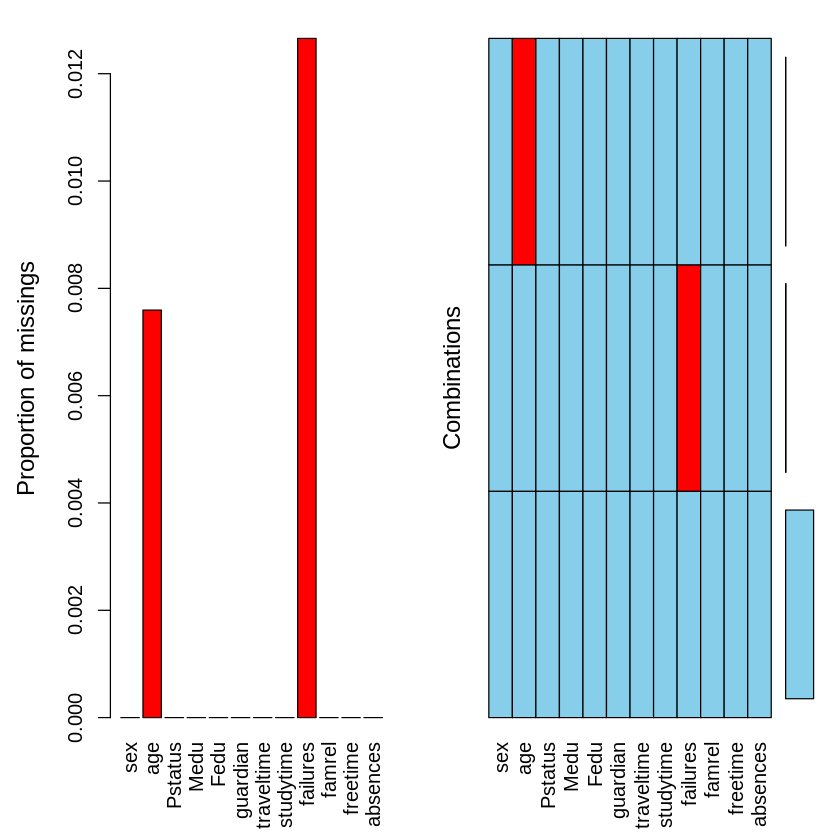

In [90]:
#결측치 처리
aggr(dt)

In [100]:
#tmp = mice(dt,
#  m=5,
#  meth='pmm',
#  seed=2022)
#summary(tmp)
#densityplot(tmp)


 iter imp variable
  1   1  age  failures
  1   2  age  failures
  1   3  age  failures
  1   4  age  failures
  1   5  age  failures
  2   1  age  failures
  2   2  age  failures
  2   3  age  failures
  2   4  age  failures
  2   5  age  failures
  3   1  age  failures
  3   2  age  failures
  3   3  age  failures
  3   4  age  failures
  3   5  age  failures
  4   1  age  failures
  4   2  age  failures
  4   3  age  failures
  4   4  age  failures
  4   5  age  failures
  5   1  age  failures
  5   2  age  failures
  5   3  age  failures
  5   4  age  failures
  5   5  age  failures


Warning message:
“Number of logged events: 3”


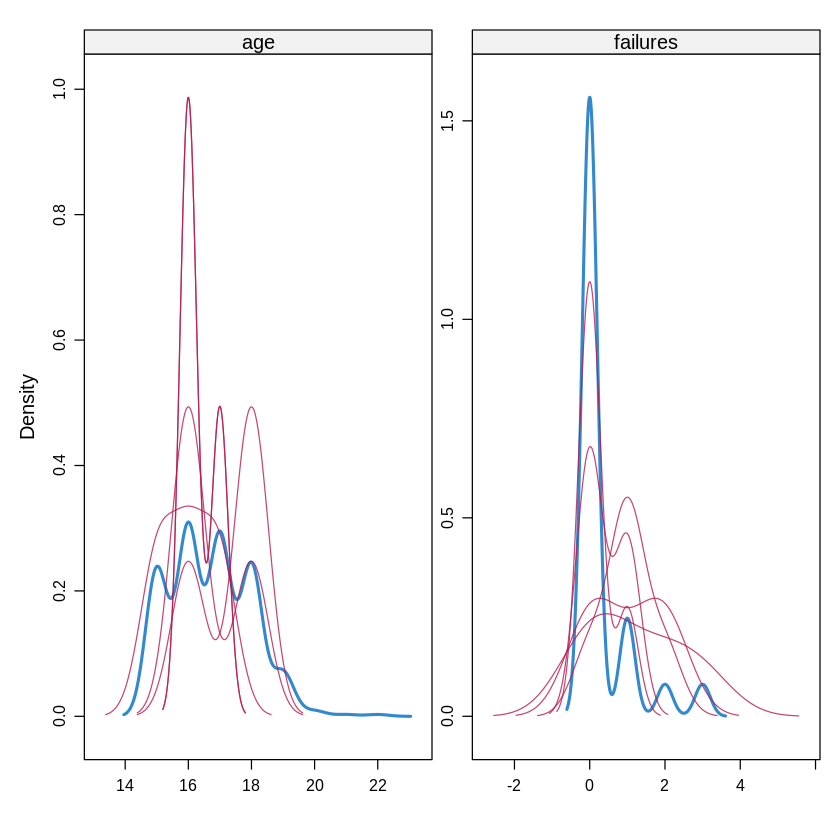

In [94]:
tmp_cart = mice(dt,
  m=5,
  meth='cart',
  seed=2022)
densityplot(tmp_cart)


 iter imp variable
  1   1  age  failures
  1   2  age  failures
  1   3  age  failures
  1   4  age  failures
  1   5  age  failures
  2   1  age  failures
  2   2  age  failures
  2   3  age  failures
  2   4  age  failures
  2   5  age  failures
  3   1  age  failures
  3   2  age  failures
  3   3  age  failures
  3   4  age  failures
  3   5  age  failures
  4   1  age  failures
  4   2  age  failures
  4   3  age  failures
  4   4  age  failures
  4   5  age  failures
  5   1  age  failures
  5   2  age  failures
  5   3  age  failures
  5   4  age  failures
  5   5  age  failures


Warning message:
“Number of logged events: 3”


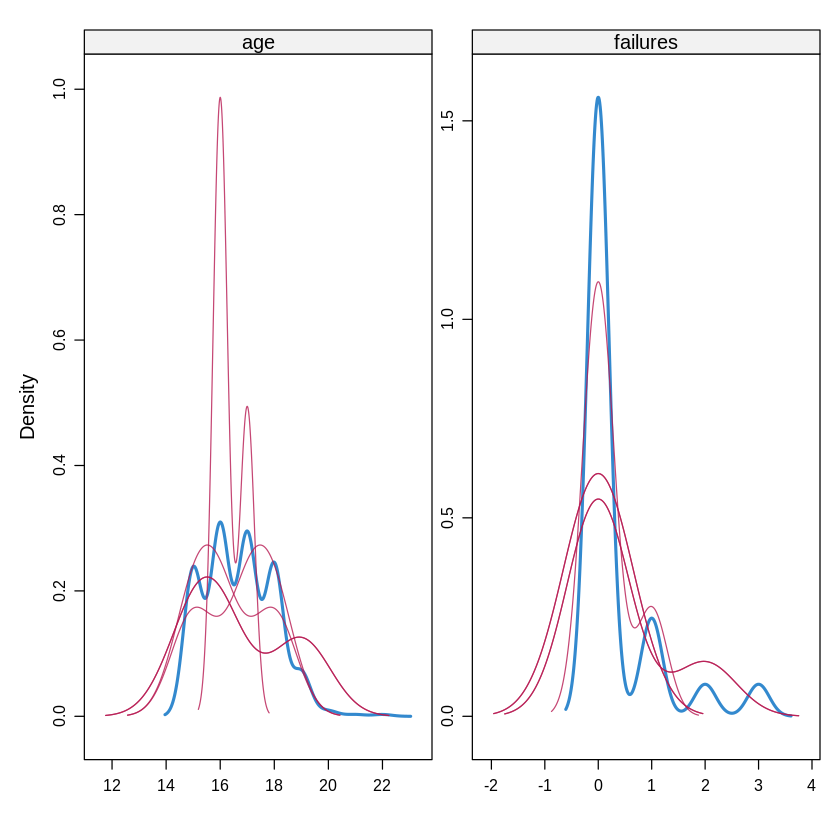

In [98]:
tmp_rf = mice(dt,
  m=5,
  meth='sample',
  seed=2022)
densityplot(tmp_rf)

In [105]:
#tmp_rf = mice(dt,
#  m=5,
# meth='rf',
#  seed=2022)
#densityplot(tmp_rf)

In [106]:
DT = complete(tmp_cart,1)

## 1-1-3.	
주어진 시험시간 내에 전처리 과정을 구현하지 못하였으나 추가로 고려할 수 있는 전처리 과정을 필요성, 수행방법, 기대효과를 포함하여 제시하시오. (5점)
1. 차원축소. 상관계수가 높은 피처들은(예, Fedu, Medu) 차원축소하거나 성능을 확인한 뒤 제거함. psych패키지 활용. 피쳐의 수가 적을수록 비용 효율적, 차원의 저주, 다중 공선성 를 예방, 성능 개선 기대.
2. 스케일링.  다른 변수에 비해 스케일이 큰 피처(예,age)가 타겟에 영향 더 많이 줄 수 있음. caret패키지 활용. 모델 예측 성능 향상 기대


# 1-2	
문제 [1-1]에서 수행된 전처리 데이터를 기반으로 학생들의 결석일수를 예측하는 기계학습 모델을 구축하시오. (20점)

## 1-2-1.
모델을 구축하기 위해 선정가능한 알고리즘을 3개 이상 추천하고, 이 가운데 2개의 알고리즘을 구현 대상으로 선정하시오. 또한, 알고리즘의 선정과정을 논리적으로 설명하고 타당함을 주장하시오. (5점)
1. 다중선형회귀
2. rf
3. xgboost
